# first step is to import and load all the required modules 

In [91]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import mplcursors
import seaborn as sns
# pd.set_option('max_columns', 300)

# below i have created a function to load csv files in accordance to World bank format

In [92]:
def read_csv(filename):
    try:
        df1 = pd.read_csv(filename)

        df1 = df1.drop(columns = [ 'Indicator Name','Country Code','Indicator Code',
           '1960', '1961', '1962', '1963', '1964', '1965', '1966', '1967', '1968',
           '1969', '1970', '1971', '1972', '1973', '1974', '1975', '1976', '1977',
           '1978', '1979', '1980', '1981', '1982', '1983', '1984', '1985', '1986',
           '1987', '1988', '1989', '1990', '1991', '1992', '1993', '1994', '1995',
           '1996', '1997', '1998', '1999'], axis = 1)
        df1 = df1.fillna(0)
        df1 = df1.loc[df1['Country Name'].isin(['India',
                                                'United Kingdom',
                                                'Bangladesh',
                                                'Ecuador',
                                                'China',
                                                'Sweden',
                                                'France',
                                                'United States',
                                                'Nigeria',
                                                'Brazil',
                                                'South Africa',
                                                'World'])]
        
       
        
        df1 = df1.reset_index(drop=True)

        df2 = df1.transpose()
        df2.columns = df2.iloc[0]
        df2 = df2.iloc[1:]
        
        df2 = df2.reset_index()
        df2 = df2.rename(columns={'index': 'Year'})
    

        return df1, df2
    
    except FileNotFoundError:
        print(f"Error: File {filename} not found")
    

# here i have loaded the csv file and then data to be split into 2 dataframes 

In [93]:
df1_pop_growth, df2_pop_growth = read_csv('API_SP.POP.GROW_DS2_en_csv_v2_5352531.csv')

In [94]:
df1_electricity_acc, df2_electricity_acc = read_csv('API_EG.ELC.ACCS.ZS_DS2_en_csv_v2_4902219.csv')

In [95]:
df1_co2_em, df2_co2_em = read_csv('API_EN.ATM.CO2E.KT_DS2_en_csv_v2_5335725.csv')

In [96]:
df1_gdp, df2_gdp = read_csv('API_NY.GDP.PCAP.CD_DS2_en_csv_v2_5357510.csv')

# Here i have loaded the first data set where years are columns and countries are rows

In [97]:
df1_pop_growth

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Bangladesh,1.905524,1.899253,1.858027,1.746537,1.661192,1.517975,1.210590,1.051117,0.887833,...,1.243571,1.267157,1.245960,1.191061,1.230795,1.249724,1.161378,1.113172,1.144210,1.149318
1,Brazil,1.366771,1.320695,1.262842,1.185669,1.139393,1.117203,1.077354,1.032027,0.987284,...,0.900343,0.868346,0.857835,0.845993,0.811256,0.792263,0.793768,0.766108,0.665177,0.528590
2,China,0.787957,0.726381,0.670000,0.622861,0.593933,0.588125,0.558374,0.522272,0.512387,...,0.678345,0.666073,0.630326,0.581456,0.573051,0.605245,0.467672,0.354741,0.238041,0.089252
3,Ecuador,1.713088,1.719686,1.737093,1.748693,1.739580,1.724433,1.721115,1.718134,1.704206,...,1.602522,1.532423,1.483599,1.479835,1.493390,1.553356,1.890909,1.909683,1.401905,1.182063
4,France,0.686783,0.729431,0.728746,0.710448,0.735098,0.749918,0.693707,0.616494,0.557564,...,0.483953,0.516540,0.468246,0.355569,0.263869,0.290202,0.358495,0.341374,0.271351,0.263855
5,United Kingdom,0.357301,0.384976,0.423337,0.465641,0.568943,0.686611,0.735049,0.778666,0.787033,...,0.695353,0.669741,0.736464,0.792368,0.757874,0.679374,0.605929,0.564131,0.365409,0.365410
6,India,1.822184,1.808446,1.776768,1.724269,1.672811,1.604129,1.524308,1.466372,1.422392,...,1.332192,1.297549,1.240362,1.187795,1.185046,1.155624,1.087528,1.025311,0.955221,0.797216
7,Nigeria,2.602869,2.651265,2.682890,2.692768,2.695503,2.693693,2.695926,2.709627,2.719687,...,2.749289,2.697474,2.628124,2.541187,2.507034,2.527317,2.496645,2.448201,2.440609,2.406363
8,Sweden,0.160575,0.268471,0.325438,0.372093,0.393299,0.399943,0.562484,0.741553,0.779033,...,0.739763,0.847349,0.992220,1.057455,1.256454,1.347445,1.161645,1.013722,0.722704,0.600592
9,United States,1.112769,0.989741,0.927797,0.859482,0.925484,0.921713,0.964254,0.951055,0.945865,...,0.733600,0.692860,0.733362,0.736217,0.724676,0.632644,0.526435,0.455381,0.961201,0.118380


# Here i have loaded the second data set where years are rows and countries are columns for population DATA

In [98]:
df2_pop_growth

Country Name,Year,Bangladesh,Brazil,China,Ecuador,France,United Kingdom,India,Nigeria,Sweden,United States,World,South Africa
0,2000,1.905524,1.366771,0.787957,1.713088,0.686783,0.357301,1.822184,2.602869,0.160575,1.112769,1.353302,0.962864
1,2001,1.899253,1.320695,0.726381,1.719686,0.729431,0.384976,1.808446,2.651265,0.268471,0.989741,1.334839,0.88566
2,2002,1.858027,1.262842,0.67,1.737093,0.728746,0.423337,1.776768,2.68289,0.325438,0.927797,1.313022,0.910101
3,2003,1.746537,1.185669,0.622861,1.748693,0.710448,0.465641,1.724269,2.692768,0.372093,0.859482,1.288672,0.924209
4,2004,1.661192,1.139393,0.593933,1.73958,0.735098,0.568943,1.672811,2.695503,0.393299,0.925484,1.274579,0.93529
5,2005,1.517975,1.117203,0.588125,1.724433,0.749918,0.686611,1.604129,2.693693,0.399943,0.921713,1.263371,0.945094
6,2006,1.21059,1.077354,0.558374,1.721115,0.693707,0.735049,1.524308,2.695926,0.562484,0.964254,1.256973,0.963593
7,2007,1.051117,1.032027,0.522272,1.718134,0.616494,0.778666,1.466372,2.709627,0.741553,0.951055,1.246524,1.013877
8,2008,0.887833,0.987284,0.512387,1.704206,0.557564,0.787033,1.422392,2.719687,0.779033,0.945865,1.246965,1.133081
9,2009,0.880093,0.953148,0.497381,1.682479,0.513103,0.756391,1.391195,2.727385,0.851904,0.876651,1.236251,1.189295


In [99]:
df1_gdp

,Country Name,2000,2001,2002,2003,2004,2005,2006,2007,2008,...,2012,2013,2014,2015,2016,2017,2018,2019,2020,2021
0,Bangladesh,413.100185,410.048541,407.962968,440.714405,469.116458,492.808649,503.538332,552.338935,630.108979,...,876.817545,973.773393,1108.515100,1236.005060,1659.961605,1815.609426,1963.411855,2122.078851,2233.305524,2457.924880
1,Brazil,3726.811420,3142.277935,2824.679625,3056.624967,3623.247996,4773.248944,5866.096224,7323.033629,8801.599484,...,12327.317440,12258.503170,12071.158210,8783.225984,8680.768792,9896.684783,9121.083403,8845.259118,6794.489159,7507.160971
2,China,959.372484,1053.108243,1148.508290,1288.643252,1508.668098,1753.417829,2099.229435,2693.970063,3468.304602,...,6300.615118,7020.338485,7636.116601,8016.431435,8094.363367,8816.986905,9905.342004,10143.838200,10408.669760,12556.333120
3,Ecuador,1451.530885,1904.813670,2184.209244,2438.343684,2703.565671,3014.310009,3340.840903,3579.032244,4260.433184,...,5678.455721,6050.354611,6374.631486,6130.586676,6079.088736,6246.404252,6321.349401,6233.258167,5645.199290,5965.132871
4,France,22416.425420,22449.339690,24288.270020,29627.924260,33797.162440,34768.175900,36470.212840,41557.623560,45515.961750,...,40870.852360,42602.717970,43068.548720,36652.922310,37062.533570,38781.049490,41557.854860,40494.898290,39055.282930,43658.978980
5,United Kingdom,28290.972500,27886.798590,30079.660040,34479.392930,40390.785830,42131.699400,44536.619720,50435.370290,47429.936340,...,42485.586070,43449.091720,47447.588930,45071.074320,41146.077360,40621.334480,43306.308300,42747.080460,40318.557570,46510.282780
6,India,442.034779,449.911125,468.844428,543.843799,624.105094,710.509345,802.013742,1022.731629,993.503772,...,1434.018198,1438.057480,1559.864518,1590.173918,1714.280355,1957.968841,1974.377788,2047.232704,1910.421473,2256.590409
7,Nigeria,565.304317,577.056970,733.538162,786.802409,992.745280,1250.406675,1652.153690,1876.412777,2227.789952,...,2728.022683,2976.756736,3200.953146,2679.554765,2144.779938,1941.879485,2125.834282,2204.181574,2074.613928,2065.749068
8,Sweden,29624.912670,27247.857730,29899.195250,37321.797900,42821.673140,43437.063120,46593.602160,53700.005340,56152.552340,...,58037.821320,61126.943200,60020.360460,51545.483610,51965.157150,53791.508730,54589.060390,51939.429740,52837.903980,61028.738060
9,United States,36329.956070,37133.623110,37997.759660,39490.274960,41724.631630,44123.407070,46302.000880,48050.223780,48570.045980,...,51784.418570,53291.127690,55123.849790,56762.729450,57866.744930,59907.754260,62823.309440,65120.394660,63530.633480,70248.629000


# function to plot histograms 

In [100]:
def plot_histogram(data, xlabel=None, ylabel=None, title=None, bins=None):

    fig, ax = plt.subplots()
    
    if bins:
        ax.hist(data, bins=bins)
    else:
        ax.hist(data)

    if xlabel:
        ax.set_xlabel(xlabel)

    if ylabel:
        ax.set_ylabel(ylabel)

    if title:
        ax.set_title(title)
    
    plt.show()


# below i have created function for creating bar plot

In [101]:
def plot_multibar(df, x_col, y_cols, x_label=False, y_label=False, title=False, rotate=False, savefig_image=False):

    fig, ax = plt.subplots()

    n = len(y_cols)
    width = 0.8 / n
    x = np.arange(len(df[x_col]))

    for i in range(n):
        offset = (i - (n-1)/2) * width
        ax.bar(x + offset, df[y_cols[i]], width=width, label=y_cols[i])
        
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)
    ax.set_title(title)
    ax.set_xticks(x)
    ax.set_xticklabels(df[x_col], rotation=rotate)
    
    ax.legend(bbox_to_anchor=(1.00, 1.0), loc='upper left')
    ax.grid(axis = 'y') 
    plt.tight_layout()
    plt.savefig(savefig_image, dpi = 300)
    plt.show()
    
    


# i have below used the bar plot function to plot population rise and CO2 emision 

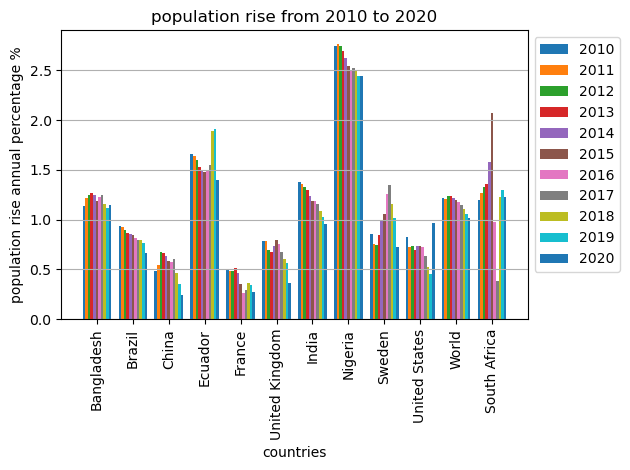

In [102]:
plot_multibar(df1_pop_growth,x_col='Country Name',
              y_cols=['2010','2011','2012','2013','2014','2015','2016', '2017', '2018', '2019', '2020'],
              x_label='countries',
              y_label='population rise annual percentage %',
              title = 'population rise from 2010 to 2020',
              rotate = 90,
              savefig_image = 'population.png')




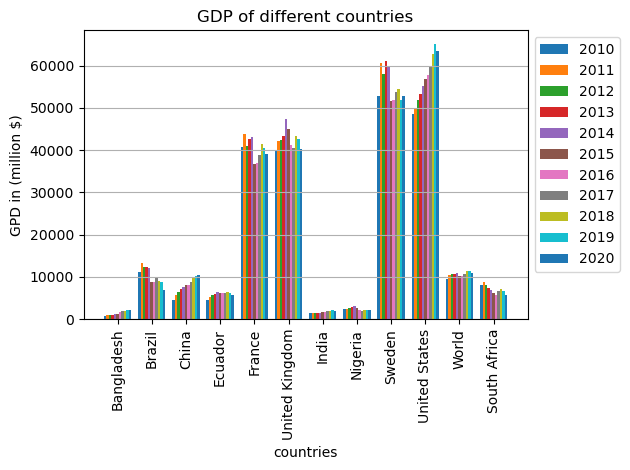

In [103]:
plot_multibar(df1_gdp,x_col='Country Name',
              y_cols=['2010','2011','2012','2013','2014','2015','2016', '2017', '2018', '2019', '2020'],
              x_label='countries',
              y_label='GPD in (million $)',
              title = 'GDP of different countries',
              rotate = 90,
              savefig_image = 'gdp.png')


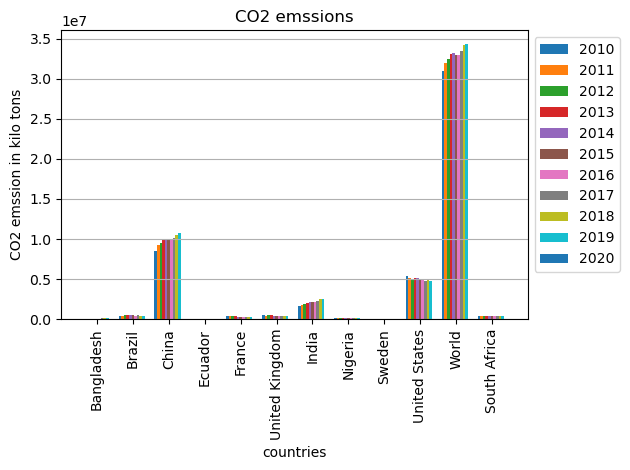

In [104]:
plot_multibar(df1_co2_em,x_col='Country Name',
              y_cols=['2010','2011','2012','2013','2014','2015','2016', '2017', '2018', '2019', '2020'],
              x_label='countries',
              y_label='CO2 emssion in kilo tons',
              title = 'CO2 emssions',
              rotate = 90,
              savefig_image = 'co2.png')

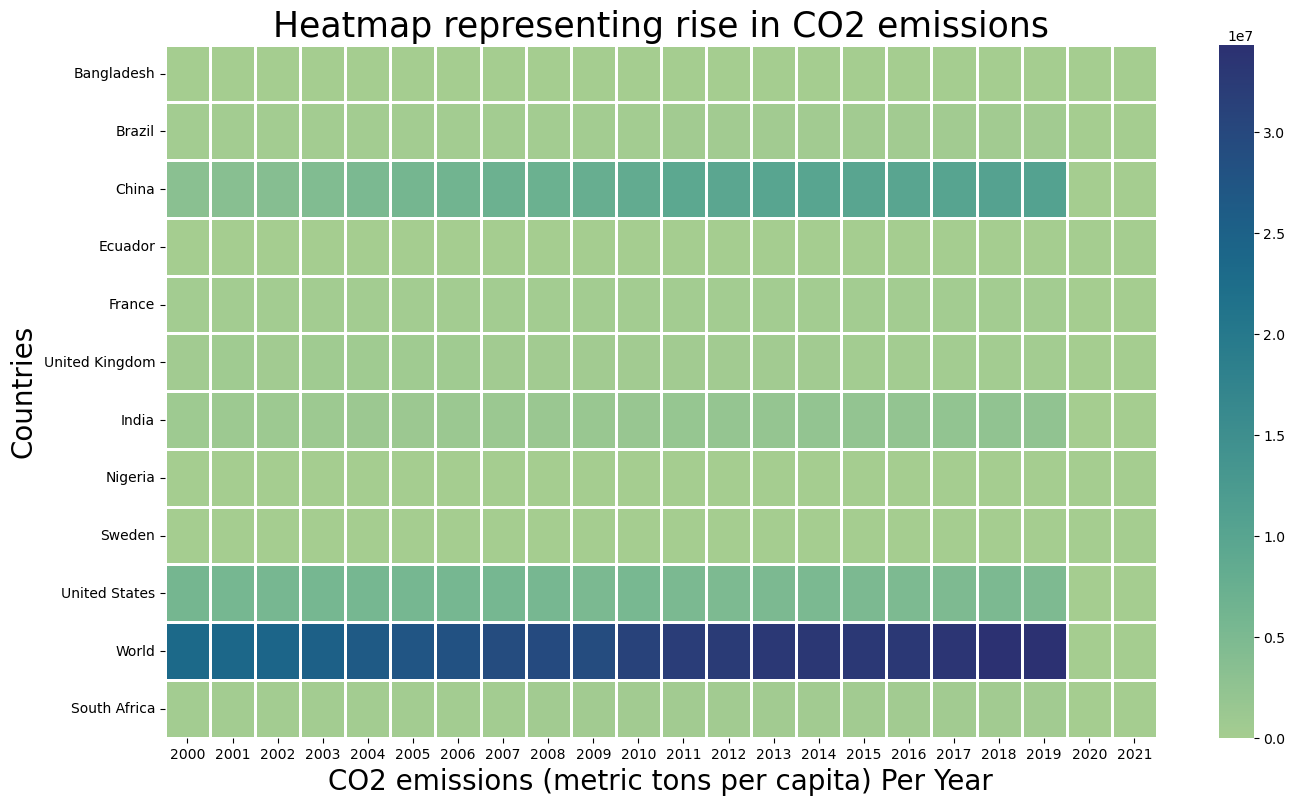

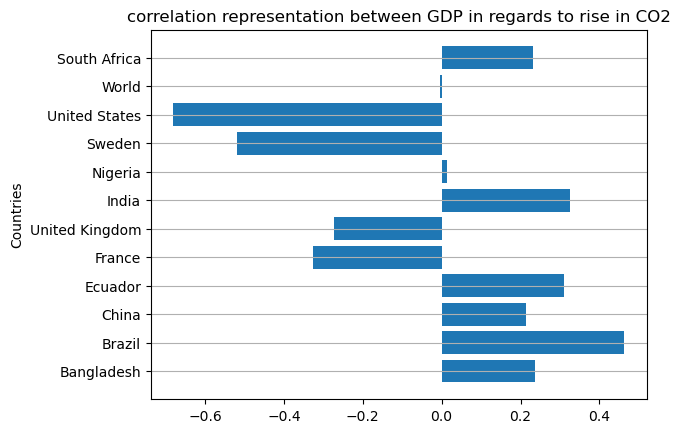

In [105]:
dfco2 = df1_co2_em.set_index('Country Name')
dfco2 = dfco2.round(1)

dfgdp = df1_gdp.set_index('Country Name')

a = dfgdp.corrwith(dfco2, axis = 1)

plt.figure(figsize=(16,9))
 
sns.heatmap(dfco2, cmap="crest", annot = False, linewidth = 2)
plt.title("Heatmap representing rise in CO2 emissions", fontsize = 25)
plt.xlabel("CO2 emissions (metric tons per capita) Per Year", fontsize = 20)
plt.ylabel("Countries", fontsize = 20)
plt.savefig('heatmap_co2_country.png', dpi=300)
plt.show()

ax = plt.figure()
plt.barh(a.index,a)
plt.ylabel('Countries')
plt.title('correlation representation between GDP in regards to rise in CO2')
plt.grid(axis='y')
plt.savefig('correlation_bar.png', dpi = 300)
plt.show()




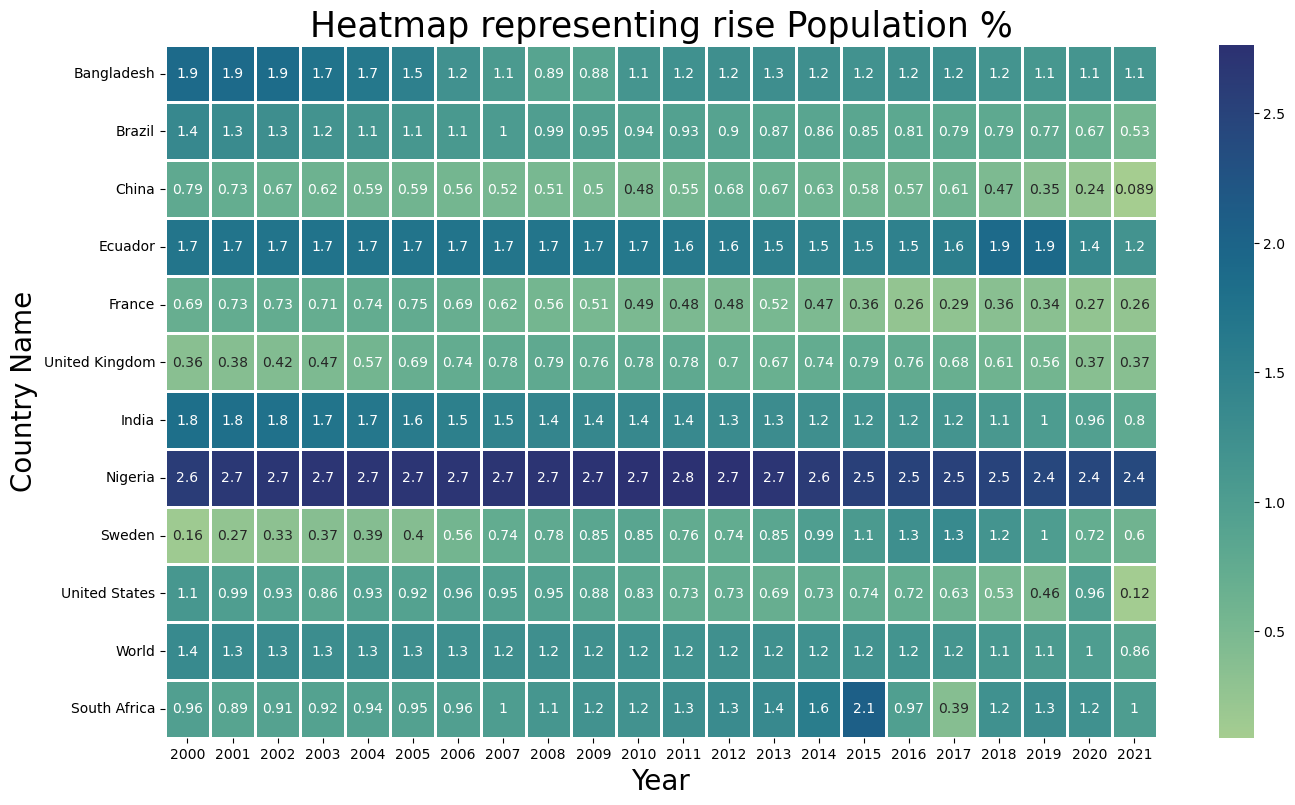

In [106]:

plt.figure(figsize=(16,9))
df1_pop_growth = df1_pop_growth.set_index('Country Name')
sns.heatmap(df1_pop_growth, cmap="crest", annot = True, linewidth = 2)
plt.title("Heatmap representing rise Population %", fontsize = 25)
plt.xlabel("Year", fontsize = 20)
plt.ylabel("Country Name", fontsize = 20)
plt.savefig('rise_pop_heatmap.png', dpi=300)
plt.show()


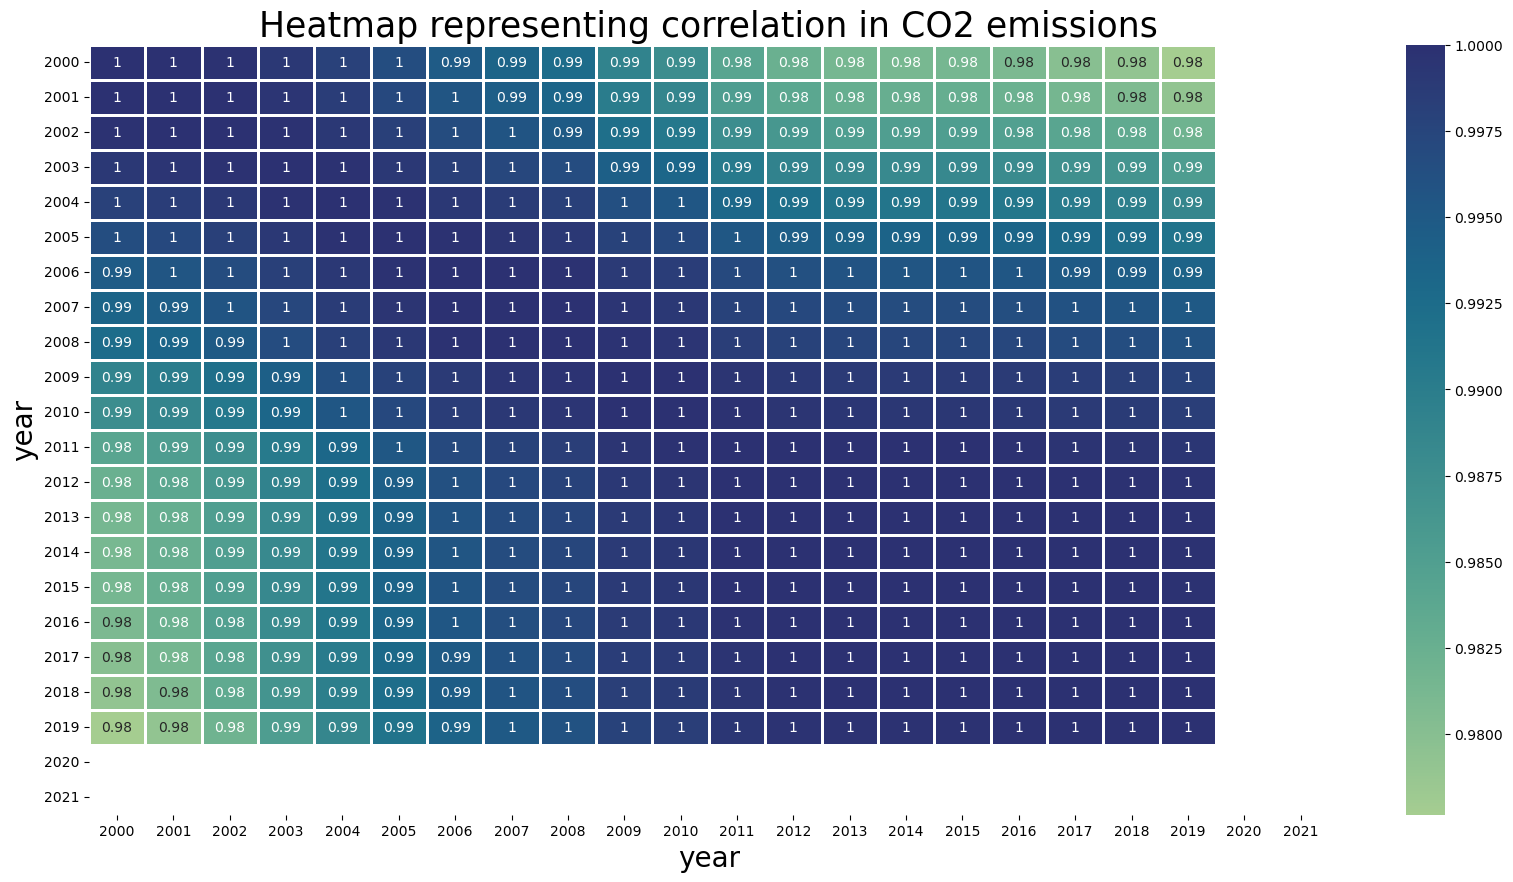

In [107]:
plt.figure(figsize=(20,10))
 
sns.heatmap(dfco2.corr(), cmap="crest", annot = True, linewidth = 2)
plt.title("Heatmap representing correlation in CO2 emissions", fontsize = 25)
plt.xlabel("year", fontsize = 20)
plt.ylabel("year", fontsize = 20)
plt.savefig('heatmap_corr_co2.png', dpi=300)
plt.show()
